# **Author: Dr. Mohammad Javad Parseh (Jahrom University)**

## Fourier Transform

### Introduction

* The French mathematician Jean Joseph Fourier developed Fourier transforms in an attempt to solve the heat equation.

* During the process, he recognized that a function can be expressed as infinite sums of sines and cosines of different frequencies, now known as the Fourier series.

* The Fourier transform is a representation in which any function can be expressed as the integral of sines and cosines multiplied with the weighted function.

* Also, any function represented in either Fourier series or transform can be reconstructed completely by an inverse process. This is known as inverse Fourier transform.

### 2D Fourier Transform Properties

* The 2D spaces with `(x, y)` and `(u, v)` as variables are referred to as the spatial domain and frequency domain respectively.
* `F(0, 0)` is the average of all pixel values in the image. Hence `F(0, 0)` is the brightest pixel in the Fourier transform image.
* The computational complexity of DFT is N2. Hence a modified method called Fast Fourier Transform (`FFT`) is used to calculate the Fourier transform. `FFT` has a complexity of NlogN and hence the word “Fast” in its name.

## Fast Fourier Transform (FFT)


<ipython-input-2-88d5934d602a>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(b1.astype('float'), 'gray')


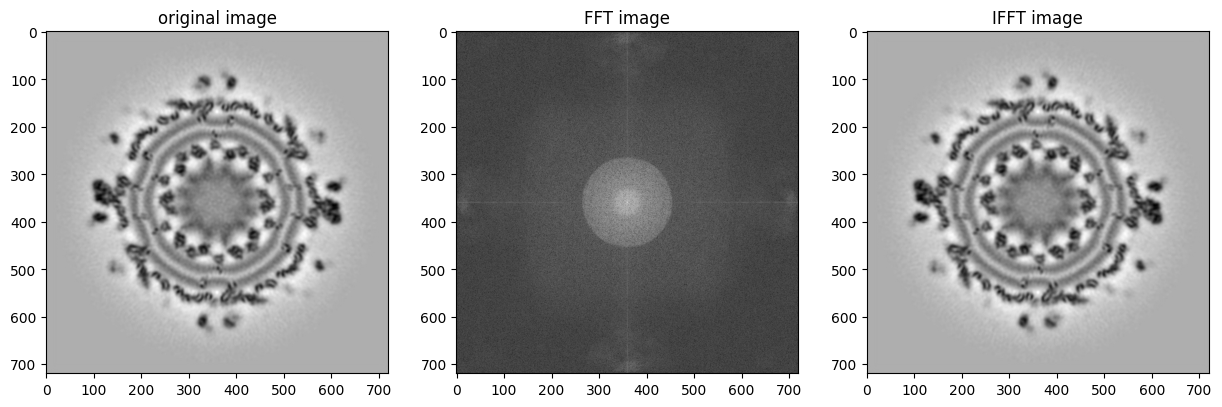

In [ ]:
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/fft1.png')).convert('L')
#b = Image.open('/content/3Whv7.png').convert('L')
# Performing FFT.
c = abs(fftim.fft2(b))
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
magnitude = np.log(d+1)
# Performing IFFT.
b1 = fftim.ifft2(fftim.fft2(b))
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(1,3,2)
plt.title('FFT image')
plt.imshow(magnitude, 'gray')

plt.subplot(1,3,3)
plt.title('IFFT image')
plt.imshow(b1.astype('float'), 'gray')

## Low-pass Filters

### Ideal Low-pass Filter

True

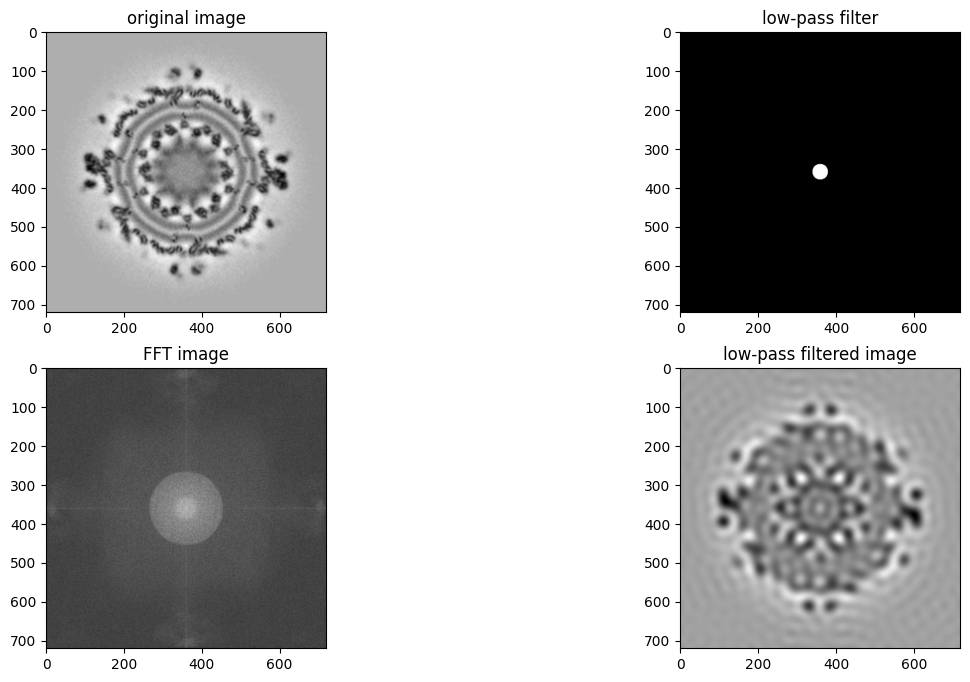

In [ ]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/fft1.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 20.0 # cut-off radius
# Defining the convolution function for ILPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to eliminate high frequency.
        if r > d_0:
            H[i,j] = 0.0
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('low-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('low-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ilowpass_output.png', e)

### Butterworth Low-pass Filter

True

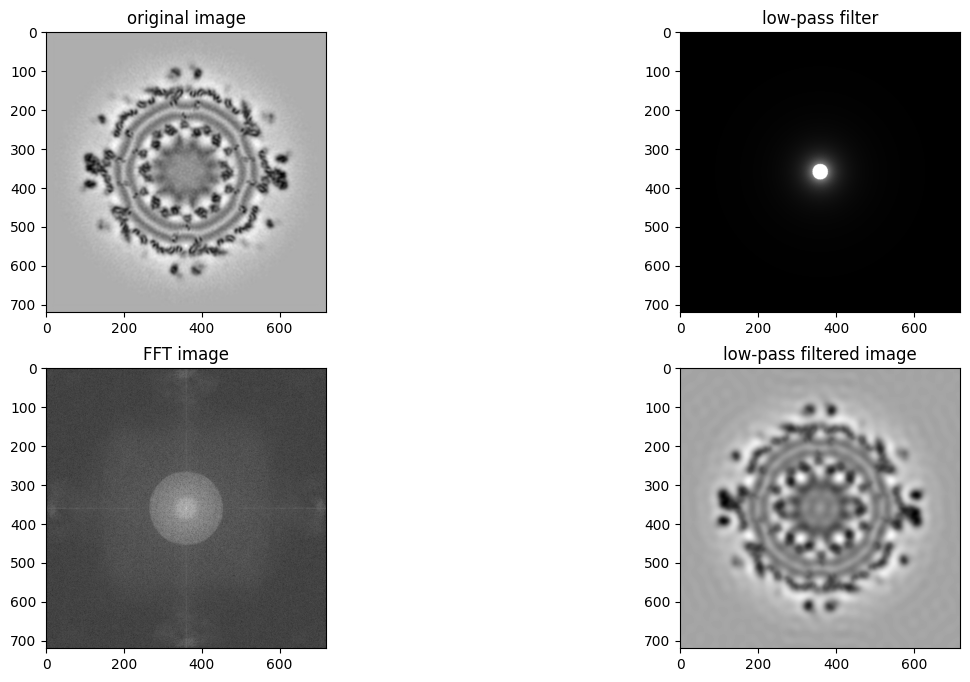

In [ ]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/fft1.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 20.0 # cut-off radius
t1 = 1 # the order of BLPF
t2 = 2*t1
# Defining the convolution function for BLPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to eliminate high frequency.
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t2)
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('low-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('low-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ilowpass_output.png', e)

### Gaussian Low-pass Filter

True

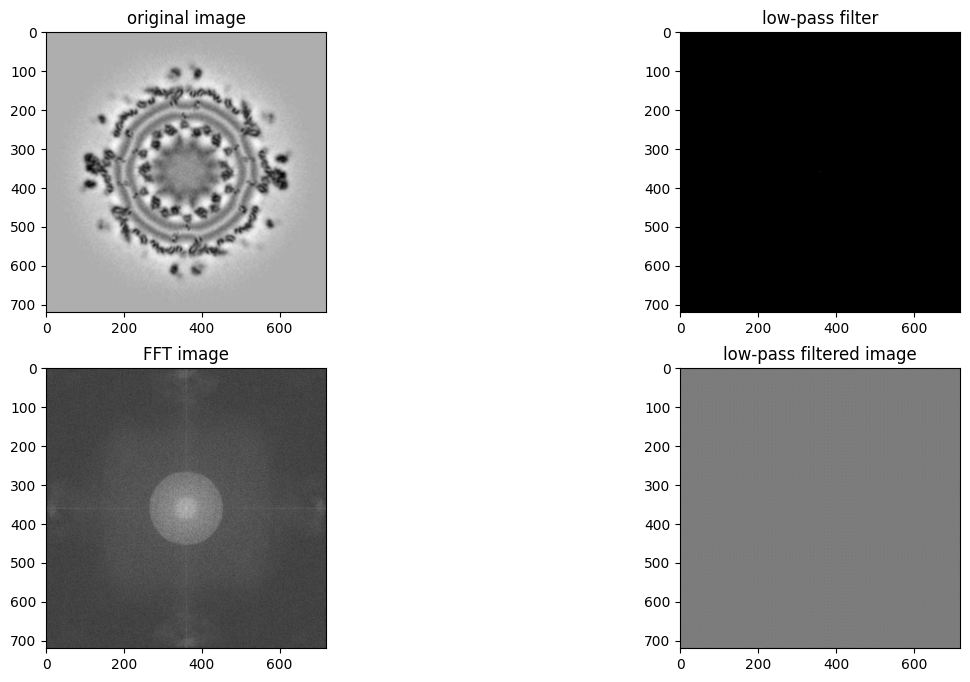

In [ ]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/fft1.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 0.00000000000000000001 # cut-off radius
t1 = 2*d_0
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from
        # origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to
        # eliminate high frequency
        if r > d_0:
            H[i,j] = math.exp(-r**2/t1**2)
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('low-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('low-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ilowpass_output.png', e)

## High-pass Filters

### Ideal High-pass Filter

True

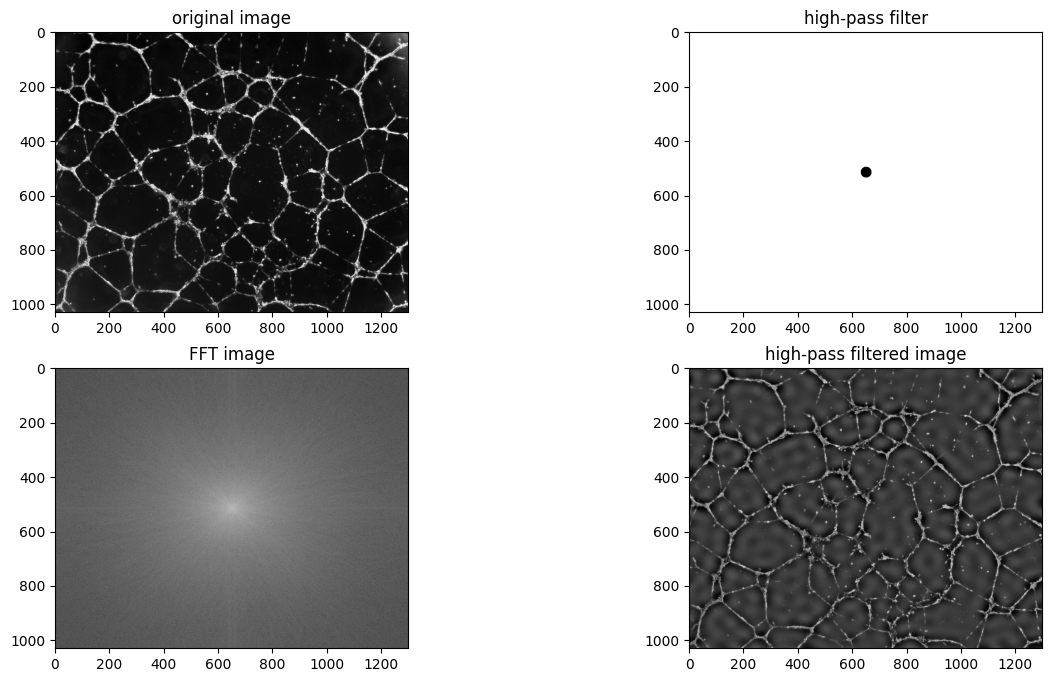

In [ ]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/endothelium.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 20.0 # cut-off radius
# Defining the convolution function for IHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('high-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('high-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ihighpass_output.png', e)
cv2.imwrite('original.png', np.asarray(b))

### Butterworth High-pass Filter

True

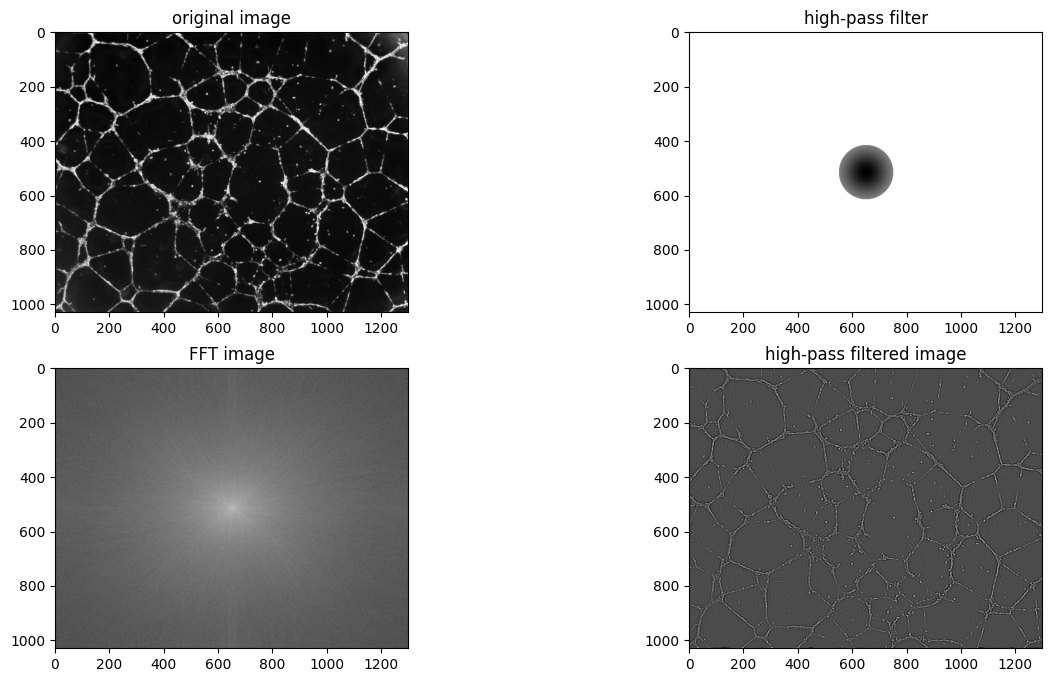

In [ ]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/endothelium.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 100.0 # cut-off radius
t1 = 1 # the order of BHPF
t2 = 2*t1
# Defining the convolution function for BHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1/(1 + (d_0/(r+0.00000000000000001))**t2)
# Converting H to an image.
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('high-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('high-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ihighpass_output.png', e)

### Gaussian High-pass Filter

True

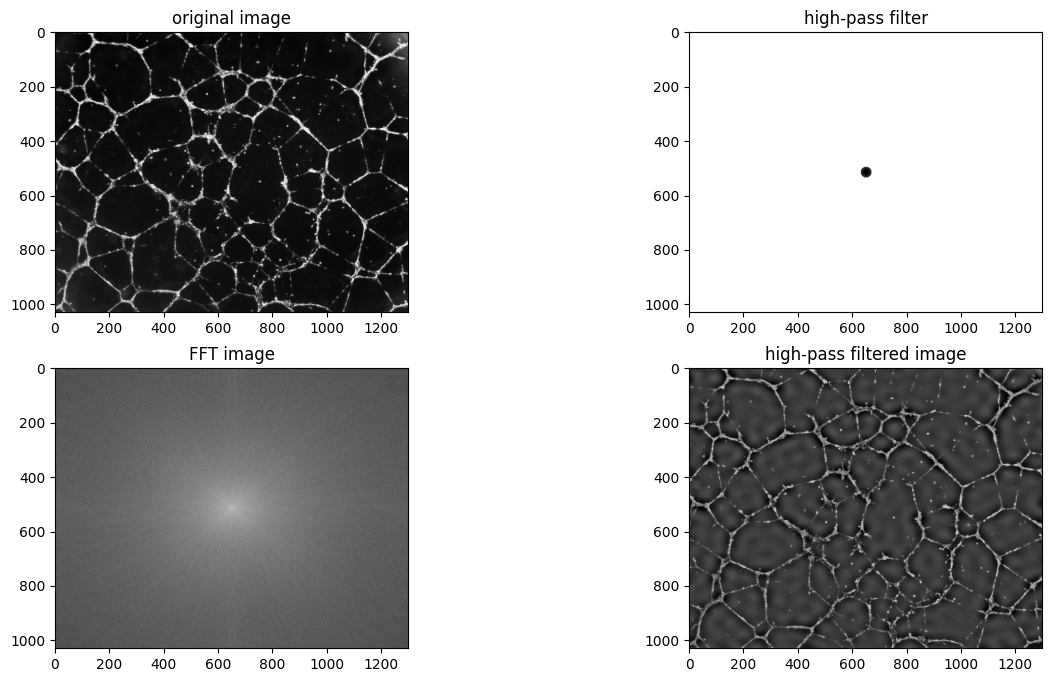

In [ ]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/endothelium.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 20.0 # cut-off radius
t1 = 2*d_0
# Defining the convolution function for GHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1 - math.exp(-r**2/t1**2)
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('high-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('high-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ihighpass_output.png', e)

## Band-pass Filter

True

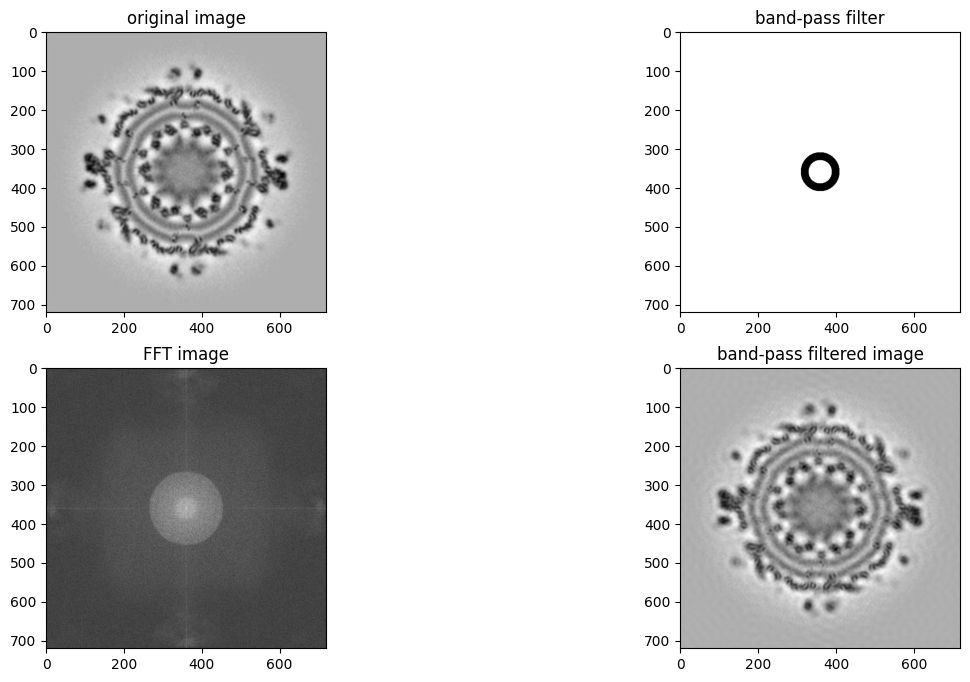

In [1]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open(os.path.join(base_path, 'images/fft1.png')).convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius
# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
        # the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 0.0
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('band-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('band-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ihighpass_output.png', e)

True

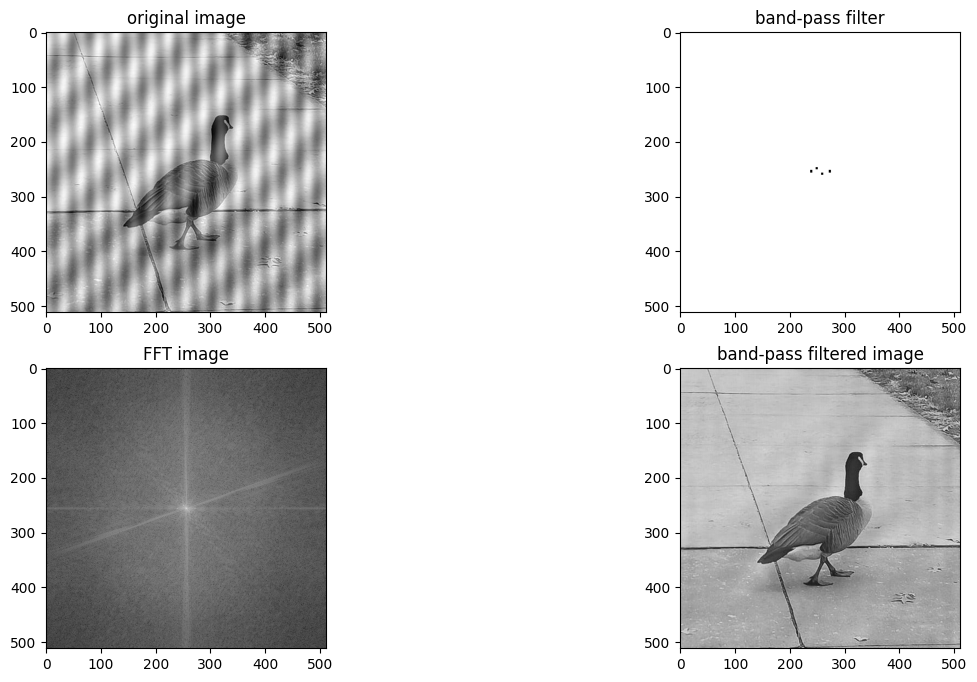

In [2]:
import cv2
import math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter07'
# Opening the image and converting it to grayscale.
b = Image.open('/content/pnois2.jpg').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1.
H = np.ones((M,N))
H[253:258, 238:242] = 0
H[248:252, 248:252] = 0
H[258:262, 258:262] = 0
H[253:258, 272:276] = 0
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(b, cmap='gray')

plt.subplot(2,2,3)
plt.title('FFT image')
plt.imshow(np.log(abs(d)+1), 'gray')

plt.subplot(2,2,2)
plt.title('band-pass filter')
plt.imshow(np.asarray(H)*255, 'gray')

plt.subplot(2,2,4)
plt.title('band-pass filtered image')
plt.imshow(e, 'gray')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('ihighpass_output.png', e)

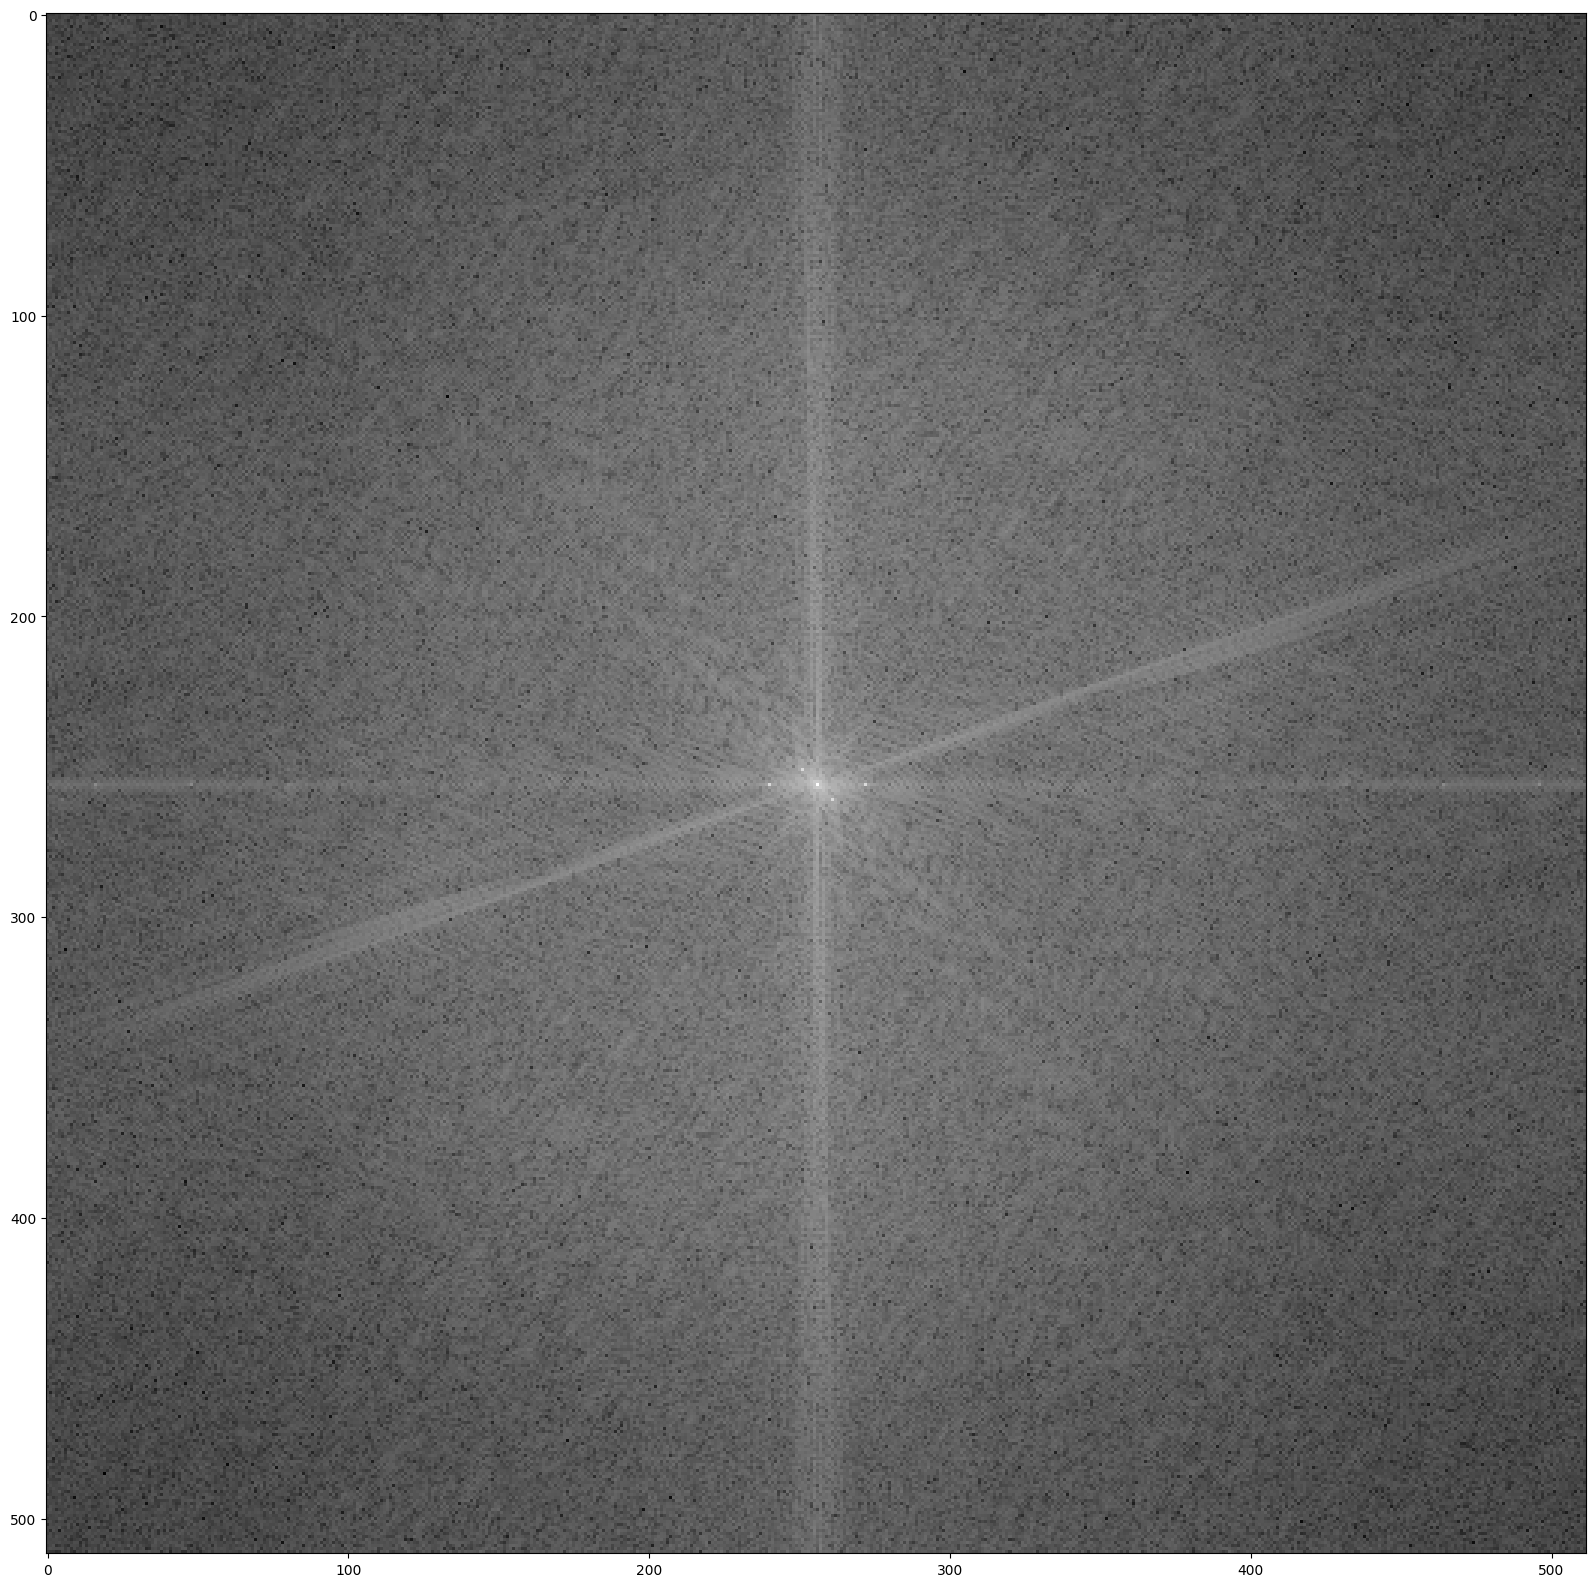

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(np.log(abs(d)+1), 'gray')
plt.show()